<a href="https://colab.research.google.com/github/rladbstj56/2024PythonDataAnalysis/blob/main/241105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dia = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/diabetes.csv')
dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dia.info()
dia_x=dia.iloc[:,:8]
dia_y=dia.iloc[:,8]
print(dia_x.head())
print(dia_y.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183 

In [4]:
x_train,x_test,y_train,y_test=train_test_split(dia_x,dia_y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [5]:
scaler = StandardScaler()
x_train_std=scaler.fit_transform(x_train)
print(x_train_std,"end\n")
x_test_std=scaler.fit_transform(x_test)
print(x_test_std)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]] end

[[ 0.49124165 -0.72667791 -0.44147615 ...  0.23374785 -0.17094071
   0.66661154]
 [-0.63368347 -0.28534901  0.31890843 ...  0.43537945 -1.08608042
  -1.07335756]
 [-0.63368347 -0.41144298 -0.17310512 ... -0.14579397 -1.05362866
  -1.07335756]
 ...
 [ 1.05370422 -0.82124838  0.18472291 ...  0.56584695  0.00754398
   1.77386461]
 [-0.63368347  0.78644972  0.09526591 ... -0.47789306 -0.47274211
  -0.44064153]
 [ 1.05370422 -1.48324172  0.09526591 ...  0.38793672  0.72148276
   0.35025352]]


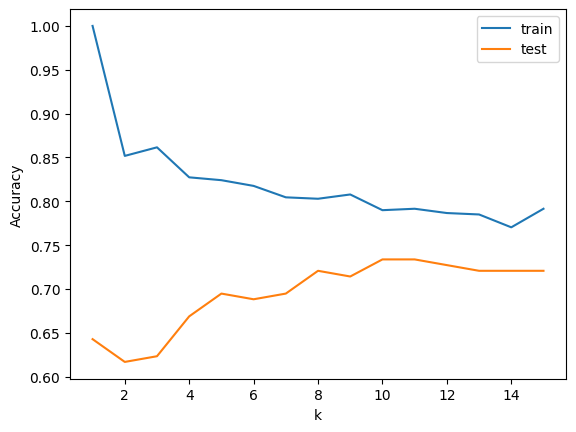

In [6]:
train_accuracy=[]
test_accuracy=[]

neighbors=range(1,16)

for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_std,y_train)
  score = knn.score(x_train_std, y_train)
  train_accuracy.append(score)
  score = knn.score(x_test_std, y_test)
  test_accuracy.append(score)
plt.plot(neighbors, train_accuracy, label='train')
plt.plot(neighbors, test_accuracy, label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
k=10 # 최근접 이웃의 수
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_std,y_train)
y_pred = knn.predict(x_test_std)
print(y_pred) # 당뇨병 여부 (1=yes, 0=no)

[0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


In [8]:
cf = confusion_matrix(y_test,y_pred)
print(cf)
print(knn.score(x_test_std,y_test))

[[85 14]
 [27 28]]
0.7337662337662337


In [9]:
score = pd.read_csv('/content/drive/MyDrive/pythondataanalysis/grade2.csv')
print(score.head())

   no  mid_test  final_test  hw1  hw2  grade mark
0   1        75          68   76   74     85   B+
1   2        76          56   95   99     85   B+
2   3        70          82   97  100     90    A
3   4        87          81  100   93     90    A
4   5        79          88   82   36     85   B+


In [16]:
score['test'] = score['mid_test']*0.4 + score['final_test']*0.4
score['test'] = score['test'].astype(int)
score['hw'] = score['hw1']*0.1 + score['hw2']*0.1
score['hw'] = score['hw'].astype(int)
print(score.head())

   no  mid_test  final_test  hw1  hw2  grade mark  test  hw
0   1        75          68   76   74     85   B+    57  15
1   2        76          56   95   99     85   B+    52  19
2   3        70          82   97  100     90    A    60  19
3   4        87          81  100   93     90    A    67  19
4   5        79          88   82   36     85   B+    66  11


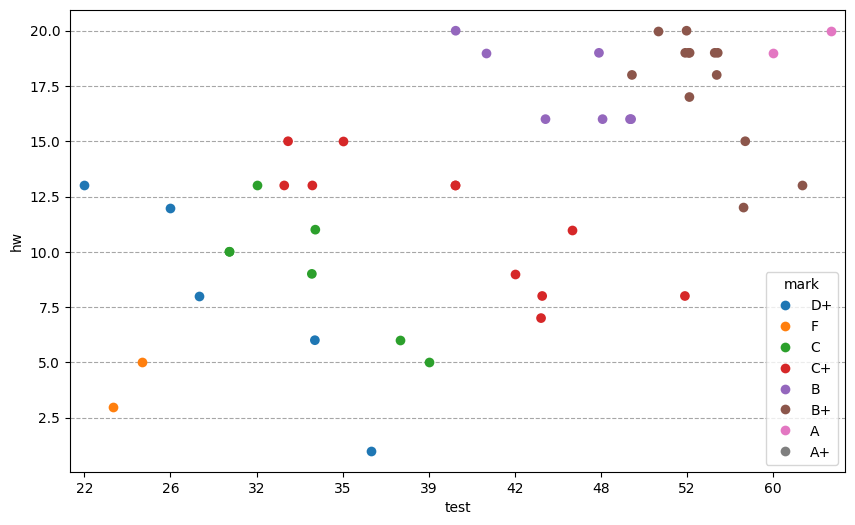

In [19]:
x = score['test']
y = score['hw']
mark = score['mark']
plt.figure(figsize=(10,6))
plt.xticks(np.arange(0, 80, 3))
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
sns.stripplot(x='test',y='hw',data=score,hue='mark',size=7)
plt.show()

In [20]:
from sklearn.neighbors import KNeighborsClassifier
data = list(zip(x,y)) # 튜플 리스트
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data,mark)
knn.score(data,mark)

0.8771929824561403

In [23]:
item = [(40,7.5),(44,14),(67,18.5)]

for i in (1,2,3,5):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(data,mark)
  pred = knn.predict(item)
  print(pred)
  print(knn.score(data,mark))

['C+' 'B' 'A']
1.0
['C' 'B' 'A']
0.8947368421052632
['C' 'C+' 'A']
0.8771929824561403
['C+' 'C+' 'A']
0.8421052631578947


In [22]:
for item in [(40,7.5),(44,14),(67,18.5)]:
  pred = knn.predict([item])
  print(pred)

['C']
['C+']
['A']


In [41]:
df = score[['test','hw']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_std = scaler.fit_transform(df)
df_std = (df_std*100).astype(int)
df2 = pd.DataFrame(df_std,columns=['test','hw'])
print(df2)

    test   hw
0     63   73
1     54   94
2     69   94
3     81   94
4     80   52
5     20   73
6     78   94
7     74  100
8     21   63
9     30   21
10    58   89
11    80  100
12    32   63
13    40   36
14    32  100
15    54   84
16    54  100
17    27   26
18    25    0
19    49   78
20    21   42
21    14   36
22    49   89
23    16   47
24    72   63
25    16   47
26     5   21
27    47   78
28     3   10
29    90   94
30    54   94
31    43   52
32    54   94
33    32   63
34    54   36
35     0   63
36   100  100
37    20   63
38     7   57
39    63   57
40    40   31
41    34   94
42    58   94
43    40   78
44    81  100
45    21   26
46    18   63
47    50  100
48    23   73
49    58   94
50    94  100
51    49   78
52    83   89
53    83  100
54    36   42
55    21   52
56    47   94


In [42]:
x = df2['test']
y = df2['hw']

data = list(zip(x,y))
item = [(40,37.5),(44,70),(67,92.5)]

print(x)
print(y)

0      63
1      54
2      69
3      81
4      80
5      20
6      78
7      74
8      21
9      30
10     58
11     80
12     32
13     40
14     32
15     54
16     54
17     27
18     25
19     49
20     21
21     14
22     49
23     16
24     72
25     16
26      5
27     47
28      3
29     90
30     54
31     43
32     54
33     32
34     54
35      0
36    100
37     20
38      7
39     63
40     40
41     34
42     58
43     40
44     81
45     21
46     18
47     50
48     23
49     58
50     94
51     49
52     83
53     83
54     36
55     21
56     47
Name: test, dtype: int64
0      73
1      94
2      94
3      94
4      52
5      73
6      94
7     100
8      63
9      21
10     89
11    100
12     63
13     36
14    100
15     84
16    100
17     26
18      0
19     78
20     42
21     36
22     89
23     47
24     63
25     47
26     21
27     78
28     10
29     94
30     94
31     52
32     94
33     63
34     36
35     63
36    100
37     63
38     57
39     57
40   

In [44]:
for i in (1,2,3,5):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(data,mark)
  print(knn.score(data,mark))
  pred = knn.predict(item)
  print(pred)

1.0
['C+' 'B' 'A']
0.9122807017543859
['C+' 'B' 'A']
0.8947368421052632
['C+' 'B' 'B+']
0.8245614035087719
['C+' 'B' 'B+']
